# Linear Regression 

## import library

In [97]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

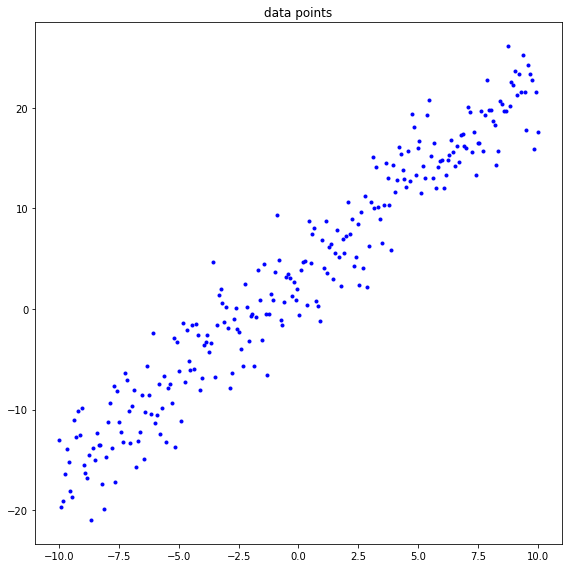

In [98]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [111]:
def compute_loss(x, y, theta0, theta1):
    A = np.vander(x,2, increasing = True)
    theta = np.array([theta0, theta1])
    loss = y - np.matmul(A,theta)
    loss = np.sum(loss)
    return loss

## compute the gradient for each model parameter

In [112]:
def compute_gradient_theta0(x, y, theta0, theta1):
    loss = compute_loss(x,y,theta0,theta1)
    dL = (2/len(x))*(-loss)
    return dL

In [113]:
def compute_gradient_theta1(x, y, theta0, theta1):
    A = np.vander(x,2, increasing = True)
    theta = np.array([theta0, theta1])
    loss_1 = y - np.matmul(A,theta)
    loss_2 = loss_1 * x
    loss = np.sum(loss_2)
    dL = (2/len(x))*(-loss)
    return dL

## gradient descent for each model parameter

In [116]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 810.77735
iteration =    1, loss = 794.56180
iteration =    2, loss = 778.67057
iteration =    3, loss = 763.09716
iteration =    4, loss = 747.83521
iteration =    5, loss = 732.87851
iteration =    6, loss = 718.22094
iteration =    7, loss = 703.85652
iteration =    8, loss = 689.77939
iteration =    9, loss = 675.98380
iteration =   10, loss = 662.46412
iteration =   11, loss = 649.21484
iteration =   12, loss = 636.23055
iteration =   13, loss = 623.50593
iteration =   14, loss = 611.03582
iteration =   15, loss = 598.81510
iteration =   16, loss = 586.83880
iteration =   17, loss = 575.10202
iteration =   18, loss = 563.59998
iteration =   19, loss = 552.32798
iteration =   20, loss = 541.28142
iteration =   21, loss = 530.45579
iteration =   22, loss = 519.84668
iteration =   23, loss = 509.44974
iteration =   24, loss = 499.26075
iteration =   25, loss = 489.27553
iteration =   26, loss = 479.49002
iteration =   27, loss = 469.90022
iteration =   28, lo

In [129]:
f = theta0_iteration[-1] + theta1_iteration[-1] * x

## plot the results

In [135]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    plt.plot(x, f, '-', color='red')
    
    plt.tight_layout()
    plt.show()

In [118]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')

    
    plt.tight_layout()
    plt.show()

In [125]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')


    plt.tight_layout()
    plt.show()

In [120]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = 

grid_loss   = 


def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')


    plt.tight_layout()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-120-aafdae4f6d48>, line 4)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

In [ ]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

In [ ]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

In [ ]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

In [ ]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)